In [2]:
pip install seaborn

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install shap

     |████████████████████████████████| 571 kB 80 kB/s eta 0:00:013
     |███▉                            | 3.7 MB 23 kB/s eta 0:19:367^C

ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install sklearn

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

     |████████████████████████████████| 1.6 MB 790 kB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install statsmodels

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install xgboost

     |████████████████████████████████| 192.9 MB 3.4 MB/s eta 0:00:01             | 2.6 MB 670 kB/s eta 0:04:4426 MB 4.7 MB/s eta 0:00:02
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install fasttext

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
pip install gcld3

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import json
import pandas as pd
import numpy as np
import fasttext as ft

review_path = "goodreads_reviews_dedup.json"
book_path = "goodreads_books.json"

# read review data, removing entries with 0 likes
reviews = []
total_reviews = 0
with open(review_path) as f:
    for line in f:
        total_reviews += 1
        entry = json.loads(line)
        if entry['n_votes'] + entry['n_comments'] > 0:
            reviews.append(entry)

print("total_reviews: ", total_reviews)

# convert to DF, retaining only relevant columns
reviews = pd.DataFrame(reviews, columns=['user_id','book_id','rating','review_text','date_added','n_votes','n_comments'])
print("reviews with 1+ like/comment: ", len(reviews))

# calculate number of reviews per user
user_reviews = reviews.groupby("user_id")["book_id"].count().rename("user_reviews")

# combine votes and comments
reviews["review_likes"] = reviews["n_votes"] + reviews["n_comments"]
reviews = reviews.drop(["n_votes","n_comments"],axis=1)

# read book data, removing books with fewer than 10 reviews
books = []
total_books = 0
with open(book_path) as f:
    for line in f:
        total_books += 1
        entry = json.loads(line)
        try:
            if int(entry['text_reviews_count']) >= 10:
                books.append(entry)
        except:
            print("error for text reviews count value: ", entry['text_reviews_count'])

print("total_books: ", total_books)

# convert to DF, retaining only relevant columns
books = pd.DataFrame(books, columns=["book_id","text_reviews_count","ratings_count","average_rating"])
print("books with 10+ reviews: ", len(books))

# join reviews and books
dat = pd.merge(reviews,books,on="book_id")
print("join reviews/books: ", len(dat))

# calculate total review likes per book
book_review_likes = dat.groupby("book_id")["review_likes"].sum().rename("book_review_likes")

# remove books with fewer than 60 total likes on reviews
book_review_likes = book_review_likes[book_review_likes>=60]
dat = dat.merge(book_review_likes,on='book_id')
print("reviews on books with 60+ review likes: ", len(dat))

# calculate like share
dat["like_share"] = dat["review_likes"]/dat["book_review_likes"]

# create popularity binary variable
popular_thresh = 0.02
dat["popular"] = np.where(dat["like_share"]>popular_thresh,1,0)

print("pre english filter popularity count:")
print(dat.groupby("popular")["user_id"].count())

# filter to books in English
language_model = ft.load_model('lid.176.bin')
pred = language_model.predict(dat["review_text"].str.replace('\n','').to_list())
keep_ind = [i for i in range(len(pred[0])) if pred[0][i][0] == '__label__en' and pred[1][i][0] > .90]
dat = dat.iloc[keep_ind,].reset_index(drop=True)
print("english reviews: ", len(dat))

# create days since added column
review_dates = pd.to_datetime(pd.to_datetime(dat["date_added"],format='%a %b %d %H:%M:%S %z %Y',errors='coerce'),utc=True,errors='coerce')
dat["days_since_review"] = (max(review_dates) - review_dates).dt.days

# add user_reviews column
dat = dat.merge(user_reviews,on='user_id')

# rename and reorder columns
dat = dat.rename(columns={"rating": "user_rating", "text_reviews_count":"book_reviews", "average_rating":"avg_rating"})
dat = dat[["book_id", "user_reviews", "user_rating", "avg_rating", "ratings_count", "review_text", "days_since_review", "review_likes", "like_share", "popular"]]
print("final length: ", len(dat))

# save dataset
dat.to_csv("filtered_reviews.csv", index=False)

total_reviews:  15739967
reviews with 1+ like/comment:  4706961
error for text reviews count value:  
error for text reviews count value:  
error for text reviews count value:  
error for text reviews count value:  
error for text reviews count value:  
error for text reviews count value:  
error for text reviews count value:  
error for text reviews count value:  
error for text reviews count value:  
error for text reviews count value:  
error for text reviews count value:  
error for text reviews count value:  
error for text reviews count value:  
error for text reviews count value:  
error for text reviews count value:  
error for text reviews count value:  
error for text reviews count value:  
error for text reviews count value:  
error for text reviews count value:  
error for text reviews count value:  
error for text reviews count value:  
error for text reviews count value:  
error for text reviews count value:  
error for text reviews count value:  
error for text reviews c

english reviews:  1981129
final length:  1981129


In [8]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download(['punkt','averaged_perceptron_tagger','vader_lexicon','stopwords','wordnet'])
pd.options.mode.chained_assignment = None

# read review data
dat = pd.read_csv("filtered_reviews.csv")
dat = dat.drop(columns=['book_id','ratings_count','review_likes','like_share'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
print(dat)

         user_reviews  user_rating  avg_rating  \
0                 218            5        4.01   
1                 218            5        3.90   
2                 218            4        4.00   
3                 218            3        4.10   
4                 218            4        4.04   
...               ...          ...         ...   
1981124             1            5        3.86   
1981125             4            5        3.40   
1981126             1            4        3.71   
1981127             5            3        4.26   
1981128             1            5        3.62   

                                               review_text  days_since_review  \
0        This is a special book. It started slow for ab...                 96   
1        I decided to give up eating processed sugar fo...                298   
2        Kevin Kelly, who is a Wired co-founder, lays o...                326   
3        A fun, fast paced science fiction thriller. I ...                3

In [10]:
# difference between user rating and average book rating
dat["rating_diff"] = dat["user_rating"]-dat["avg_rating"]
dat = dat.drop(columns=['avg_rating'])

# flag if review contains a quotation
dat["quote"] = dat["review_text"].str.contains("\"")

# tokenize for review length (num words), avg sentence length, avg word length
dat["tokenized_sents"] = dat["review_text"].apply(nltk.tokenize.sent_tokenize)
dat["num_sentences"] = dat["tokenized_sents"].apply(len)

dat["tokenized_words"] = dat["review_text"].apply(lambda review: [word.lower() for word in nltk.tokenize.word_tokenize(review) if word.isalpha()])
dat["num_words"] = dat["tokenized_words"].apply(len)
dat["avg_sent_len"] = dat["num_words"]/dat["num_sentences"]
dat["num_letters"] = dat["tokenized_words"].apply(lambda review: len([letter for word in review for letter in word]))
dat["avg_word_len"] = dat["num_letters"]/dat["num_words"]
dat = dat.drop(columns=['review_text','num_sentences','num_letters'])

print(dat)

# part of speech tagging
dat["pos_tags"] = dat["tokenized_words"].apply(nltk.pos_tag)

def count_pos(pos_tags, pos):
    counts = 0
    for word in pos_tags:
        if word[1][0] in pos:
            counts += 1
    return(counts)

dat["verbs"] = dat["pos_tags"].apply(count_pos,pos=["V"])
dat["pct_verbs"] = dat["verbs"]/dat["num_words"]
dat["nouns"] = dat["pos_tags"].apply(count_pos,pos=["N"])
dat["pct_nouns"] = dat["nouns"]/dat["num_words"]
dat["adj"] = dat["pos_tags"].apply(count_pos,pos=["J","R"])
dat["pct_adj"] = dat["adj"]/dat["num_words"]
dat = dat.drop(columns=['pos_tags','verbs','nouns','adj'])

print(dat)

# sentiment analysis
sid = SentimentIntensityAnalyzer()

def review_sentiment(review_sents):
    comptot = 0
    for sentence in review_sents:
        scores = sid.polarity_scores(sentence)
        comptot += scores['compound']
    return(comptot/len(review_sents))

dat["sentiment"] = dat["tokenized_sents"].apply(review_sentiment)
dat = dat.drop(columns=['tokenized_sents'])

print(dat)
# further text processing
# remove stop words
stopwords = nltk.corpus.stopwords.words('english')
dat["tokenized_words"] = dat["tokenized_words"].apply(lambda review: [word for word in review if word not in stopwords])
# lemmatization
wnl = nltk.stem.wordnet.WordNetLemmatizer()
dat["tokenized_words"] = dat["tokenized_words"].apply(lambda review: [wnl.lemmatize(word) for word in review])

dat = dat[["popular","user_reviews","days_since_review","user_rating","rating_diff","num_words","avg_word_len","avg_sent_len","pct_verbs","pct_nouns","pct_adj","quote","sentiment","tokenized_words"]]

print(dat)
# save dataset
dat.to_csv("tokenized_reviews.csv", index=False)

         user_reviews  user_rating  days_since_review  popular  rating_diff  \
0                 218            5                 96        1         0.99   
1                 218            5                298        1         1.10   
2                 218            4                326        1         0.00   
3                 218            3                353        1        -1.10   
4                 218            4                406        1        -0.04   
...               ...          ...                ...      ...          ...   
1981124             1            5               2614        1         1.14   
1981125             4            5                779        0         1.60   
1981126             1            4               1738        0         0.29   
1981127             5            3               1208        0        -1.26   
1981128             1            5               3730        1         1.38   

         quote                                    t

In [6]:
import sys
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

np.set_printoptions(threshold=sys.maxsize)

# read/prep data
dat = pd.read_csv("tokenized_reviews.csv")
dat = dat.dropna()
dat["quote"] = dat["quote"].astype(int)
dat["tokenized_words"] = dat["tokenized_words"].apply(lambda x: x.strip("[']").replace("', '"," "))


# 85% train / 15% test
X_train, X_test, y_train, y_test = train_test_split(dat.drop(columns=["popular"]), 
                                                    dat["popular"],
                                                    test_size = 0.15,
                                                    random_state = 229)

# feature subsets
subset_a = ["user_reviews","days_since_review","user_rating","rating_diff"]
subset_b = ["user_reviews","days_since_review","user_rating","rating_diff",
            "num_words","avg_word_len","avg_sent_len","pct_verbs",
            "pct_nouns","pct_adj","quote","sentiment"]

# SUBSET A
print("LOGISTIC REGRESSION SUBSET A")

# train
log_reg = sm.Logit(y_train, sm.add_constant(X_train[subset_a])).fit()
print(log_reg.summary())

# predict
predictions = log_reg.predict(sm.add_constant(X_test[subset_a]))
predictions = list(map(round,predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

# SUBSET B
print("\n\nLOGISTIC REGRESSION SUBSET B")

# train
log_reg = sm.Logit(y_train, sm.add_constant(X_train[subset_b])).fit()
print(log_reg.summary())

# predict
predictions = log_reg.predict(sm.add_constant(X_test[subset_b]))
predictions = list(map(round,predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

# UNDERSAMPLE
print("\n\nUNDERSAMPLE")

# undersample train set
majority_size = len(y_train[y_train==0])
minority_size = len(y_train[y_train==1])
majority_indices = y_train[y_train==0].index
rng = np.random.default_rng(seed=229)
drop_indices = rng.choice(majority_indices, majority_size-minority_size, replace=False)
X_train = X_train.drop(drop_indices)
y_train = y_train.drop(drop_indices)

# SUBSET A
print("LOGISTIC REGRESSION SUBSET A")

# train
log_reg = sm.Logit(y_train, sm.add_constant(X_train[subset_a])).fit()
print(log_reg.summary())

# predict
predictions = log_reg.predict(sm.add_constant(X_test[subset_a]))
predictions = list(map(round,predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

# SUBSET B
print("\n\nLOGISTIC REGRESSION SUBSET B")

# train
log_reg = sm.Logit(y_train, sm.add_constant(X_train[subset_b])).fit()
print(log_reg.summary())

# predict
predictions = log_reg.predict(sm.add_constant(X_test[subset_b]))
predictions = list(map(round,predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))


LOGISTIC REGRESSION SUBSET A
Optimization terminated successfully.
         Current function value: 0.478501
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                popular   No. Observations:              1683881
Model:                          Logit   Df Residuals:                  1683876
Method:                           MLE   Df Model:                            4
Date:                Sun, 15 May 2022   Pseudo R-squ.:                 0.05992
Time:                        17:26:13   Log-Likelihood:            -8.0574e+05
converged:                       True   LL-Null:                   -8.5710e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.1043      0.028     39.828      0.000    

In [ ]:
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

np.set_printoptions(threshold=sys.maxsize)

# read/prep data
dat = pd.read_csv("tokenized_reviews.csv")
dat = dat.dropna()
dat["quote"] = dat["quote"].astype(int)
dat["tokenized_words"] = dat["tokenized_words"].apply(lambda x: x.strip("[']").replace("', '"," "))


# 85% train / 15% test
X_train, X_test, y_train, y_test = train_test_split(dat.drop(columns=["popular"]), 
                                                    dat["popular"],
                                                    test_size = 0.15,
                                                    random_state = 229)

# undersample train set
majority_size = len(y_train[y_train==0])
minority_size = len(y_train[y_train==1])
majority_indices = y_train[y_train==0].index
rng = np.random.default_rng(seed=229)
drop_indices = rng.choice(majority_indices, majority_size-minority_size, replace=False)
X_train = X_train.drop(drop_indices)
y_train = y_train.drop(drop_indices)

# BAG OF WORDS
print("\n\nLOGISTIC REGRESSION BOW")

# pipeline
bow_pipe = make_pipeline(
    ColumnTransformer(remainder='passthrough',
                      transformers=[('countvectorizer',
                                     CountVectorizer(),
                                     'tokenized_words')]),
    StandardScaler(with_mean=False),
    LogisticRegression(penalty='l2',
                       solver='saga',
                       max_iter=1000,
                       random_state=229,
                       n_jobs=-1))

# parameters to try
parameters = {
    'columntransformer__countvectorizer__max_features': (10000,50000),
    'logisticregression__C': (10, 1, 0.01, 0.001)
}

# perform validation
gs_bow_pipe = GridSearchCV(bow_pipe, 
                           parameters, 
                           cv=ShuffleSplit(n_splits=1, 
                                           test_size=0.13, 
                                           random_state=229))
gs_bow_pipe.fit(X_train, y_train)
print(gs_bow_pipe.cv_results_)
print(gs_bow_pipe.best_params_)

# predict
predictions = gs_bow_pipe.predict(X_test)
predictions = list(map(round,predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

# feature importance
coefficients = gs_bow_pipe.best_estimator_.named_steps['logisticregression'].coef_[0]
num_nonzero_coefs = len(np.where(abs(coefficients) > 0)[0])
sorted_ind = np.argsort(abs(coefficients))[::-1][:num_nonzero_coefs]
print(len(sorted_ind))
print(np.take(coefficients,sorted_ind.tolist()))
print(np.take(gs_bow_pipe.best_estimator_.named_steps['columntransformer'].get_feature_names(),sorted_ind.tolist()))

# TF-IDF
print("\n\nLOGISTIC REGRESSION TF-IDF")

# pipeline
tf_pipe = make_pipeline(
    ColumnTransformer(remainder='passthrough',
                      transformers=[('tfidfvectorizer',
                                     TfidfVectorizer(),
                                     'tokenized_words')]),
    StandardScaler(with_mean=False),
    LogisticRegression(penalty='l2',
                       solver='saga',
                       max_iter=1000,
                       random_state=229,
                       n_jobs=-1))

# parameters to try
parameters = {
    'logisticregression__C': (10, 1, 0.01, 0.001)
}

# perform validation
gs_tf_pipe = GridSearchCV(tf_pipe, 
                           parameters, 
                           cv=ShuffleSplit(n_splits=1, 
                                           test_size=0.13, 
                                           random_state=229))
gs_tf_pipe.fit(X_train, y_train)
print(gs_tf_pipe.cv_results_)
print(gs_tf_pipe.best_params_)

# predict
predictions = gs_tf_pipe.predict(X_test)
predictions = list(map(round,predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

# feature importance
coefficients = gs_tf_pipe.best_estimator_.named_steps['logisticregression'].coef_[0]
num_nonzero_coefs = len(np.where(abs(coefficients) > 0)[0])
sorted_ind = np.argsort(abs(coefficients))[::-1][:num_nonzero_coefs]
print(len(sorted_ind))
print(np.take(coefficients,sorted_ind.tolist()))
print(np.take(gs_tf_pipe.best_estimator_.named_steps['columntransformer'].get_feature_names(),sorted_ind.tolist()))


RANDOM FOREST SUBSET A
{'mean_fit_time': array([  6.17518568,  11.65195394, 112.09067631,  11.47117496,
        22.5085535 , 221.82397866,  17.90258598,  35.75986719,
       350.60607505,   6.03085041,  11.72681546, 111.35820556,
        11.6582942 ,  22.43667459, 218.423352  ,  18.48060012,
        35.77954102, 339.26907277,   6.2518177 ,  11.59589577,
       111.88311243,  11.50949597,  22.40764499, 219.68212318,
        17.93870211,  34.7679317 , 340.38827324]), 'std_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'mean_score_time': array([0.03138947, 0.02668715, 0.06223559, 0.0279634 , 0.03393793,
       0.11465549, 0.03015161, 0.03846765, 0.18306708, 0.01909733,
       0.02707171, 0.0619247 , 0.02649117, 0.03301668, 0.13114214,
       0.03258967, 0.03867865, 0.17232108, 0.02676797, 0.02956104,
       0.06817889, 0.03263092, 0.03188157, 0.1246593 , 0.03151417,
       0.03668737, 0.17434812]), 'st

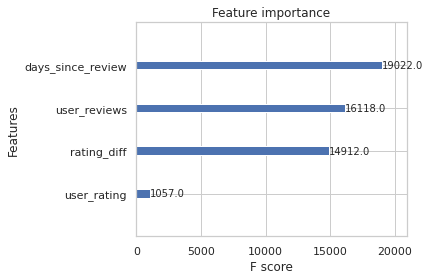

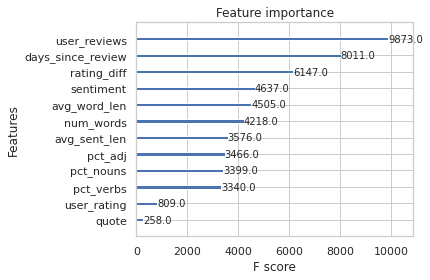

In [3]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

# read/prep data
dat = pd.read_csv("tokenized_reviews.csv")
dat = dat.dropna()
dat["quote"] = dat["quote"].astype(int)
dat["tokenized_words"] = dat["tokenized_words"].apply(lambda x: x.strip("[']").replace("', '"," "))


X_train, X_test, y_train, y_test = train_test_split(dat.drop(columns=["popular"]), 
                                                    dat["popular"],
                                                    test_size = 0.15,
                                                    random_state = 229)

#changed the test_size to 15%.
# feature subsets
subset_a = ["user_reviews","days_since_review","user_rating","rating_diff"]
subset_b = ["user_reviews","days_since_review","user_rating","rating_diff",
            "num_words","avg_word_len","avg_sent_len","pct_verbs",
            "pct_nouns","pct_adj","quote","sentiment"]


# SUBSET A
print("RANDOM FOREST SUBSET A")

# model
rf = xgb.XGBRegressor(objective='binary:logistic',
                      eval_metric='error',
                      seed=229,
                      n_jobs=-1)

# parameters to try
parameters = {
    'n_estimators': (50,100,1000),
    'max_depth': (2,4,6),
    'learning_rate': (0.01, 0.1, 0.3)
}

# perform validation
gs_rf = GridSearchCV(rf,
                     parameters,
                     cv=ShuffleSplit(n_splits=1,
                                     test_size=0.13,
                                     random_state=229))
gs_rf.fit(X_train[subset_a], y_train)
print(gs_rf.cv_results_)
print(gs_rf.best_params_)

# predict
predictions = gs_rf.predict(X_test[subset_a])
predictions = list(map(round,predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

# feature importance
print(gs_rf.best_estimator_.feature_importances_)
xgb.plot_importance(gs_rf.best_estimator_)
plt.tight_layout()
plt.savefig("rf_full_a.png")

# SUBSET B
print("\n\nRANDOM FOREST SUBSET B")

# model, parameters to try, gridsearch defined above

# perform validation
gs_rf.fit(X_train[subset_b], y_train)
print(gs_rf.cv_results_)
print(gs_rf.best_params_)

# predict
predictions = gs_rf.predict(X_test[subset_b])
predictions = list(map(round,predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

# feature importance
print(gs_rf.best_estimator_.feature_importances_)
xgb.plot_importance(gs_rf.best_estimator_)
plt.tight_layout()
plt.savefig("rf_full_b.png")

RANDOM FOREST SUBSET A
{'mean_fit_time': array([  3.51418614,   6.85064244,  68.79172134,   6.88028097,
        13.86282659, 137.44735312,  11.56536579,  22.55790138,
       164.13793898,   1.70830536,   2.9335022 ,  30.44563985,
         3.00464463,   5.72299266,  65.98100615,   5.41279936,
        12.39310312, 104.2001369 ,   1.7332449 ,   2.89723396,
        30.98867297,   3.05023742,   5.87534022,  63.52798462,
         5.15996504,  10.70991874, 101.21425319]), 'std_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'mean_score_time': array([0.01766348, 0.02018762, 0.03984666, 0.01812339, 0.02254891,
       0.062222  , 0.0206213 , 0.0272181 , 0.08673191, 0.02199793,
       0.02235198, 0.03135157, 0.01505351, 0.01955771, 0.06196165,
       0.00937319, 0.01621628, 0.06879282, 0.00861931, 0.00882483,
       0.02859402, 0.01159883, 0.01069736, 0.04366946, 0.01987934,
       0.01682734, 0.08060813]), 'st

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


[0.00598376 0.00432864 0.00369671 0.00352712 0.00299867 0.00287864
 0.00287486 0.00275257 0.00272919 0.00270093 0.00253641 0.00251157
 0.00250328 0.00244664 0.00230591 0.00221026 0.00217029 0.00215959
 0.00215363 0.00214862 0.00203982 0.00203303 0.00203055 0.00199099
 0.00197456 0.00191422 0.00190005 0.00188784 0.00181462 0.00175
 0.00166785 0.00160826 0.00160612 0.00157706 0.00149289 0.00148303
 0.00145451 0.00145159 0.00145101 0.00143607 0.00143355 0.00141939
 0.00141558 0.00140236 0.00138865 0.00138763 0.00137608 0.00137447
 0.0013622  0.00134949]


RANDOM FOREST TF-IDF
Fitting 1 folds for each of 8 candidates, totalling 8 fits
[CV 1/1] END xgbregressor__learning_rate=0.1, xgbregressor__max_depth=4, xgbregressor__n_estimators=100;, score=0.188 total time= 2.8min
[CV 1/1] END xgbregressor__learning_rate=0.1, xgbregressor__max_depth=4, xgbregressor__n_estimators=1000;, score=0.219 total time=17.6min
[CV 1/1] END xgbregressor__learning_rate=0.1, xgbregressor__max_depth=6, xgbregressor_

FileNotFoundError: [Errno 2] No such file or directory: 'data/rf_predictions.pkl'

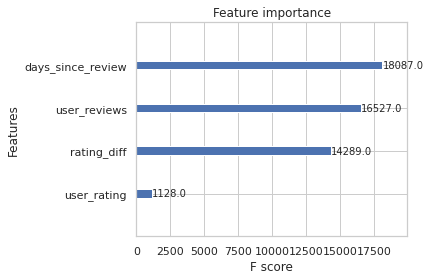

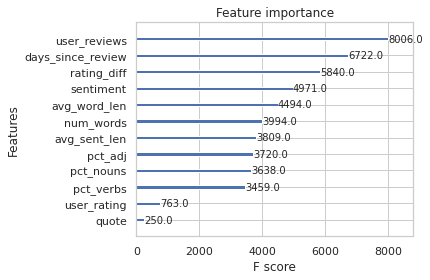

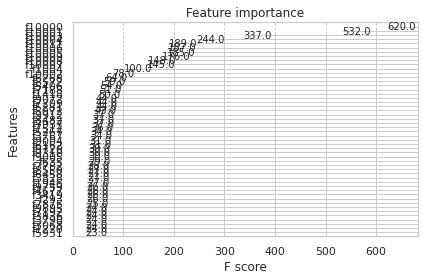

In [4]:
import sys
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

# read/prep data
dat = pd.read_csv("tokenized_reviews.csv")
dat = dat.dropna()
dat["quote"] = dat["quote"].astype(int)
dat["tokenized_words"] = dat["tokenized_words"].apply(lambda x: x.strip("[']").replace("', '"," "))


# 85% train / 15% test
X_train, X_test, y_train, y_test = train_test_split(dat.drop(columns=["popular"]), 
                                                    dat["popular"],
                                                    test_size = 0.15,
                                                    random_state = 229)

# undersample train set
majority_size = len(y_train[y_train==0])
minority_size = len(y_train[y_train==1])
majority_indices = y_train[y_train==0].index
rng = np.random.default_rng(seed=229)
drop_indices = rng.choice(majority_indices, majority_size-minority_size, replace=False)
X_train = X_train.drop(drop_indices)
y_train = y_train.drop(drop_indices)

# feature subsets
subset_a = ["user_reviews","days_since_review","user_rating","rating_diff"]
subset_b = ["user_reviews","days_since_review","user_rating","rating_diff",
            "num_words","avg_word_len","avg_sent_len","pct_verbs",
            "pct_nouns","pct_adj","quote","sentiment"]


# SUBSET A
print("RANDOM FOREST SUBSET A")

# model
rf = xgb.XGBRegressor(objective='binary:logistic',
                      eval_metric='error',
                      seed=229,
                      n_jobs=-1)

# parameters to try
parameters = {
    'n_estimators': (50,100,1000),
    'max_depth': (2,4,6),
    'learning_rate': (0.01, 0.1, 0.3)
}

# perform validation
gs_rf = GridSearchCV(rf,
                     parameters,
                     cv=ShuffleSplit(n_splits=1,
                                     test_size=0.13,
                                     random_state=229))
gs_rf.fit(X_train[subset_a], y_train)
print(gs_rf.cv_results_)
print(gs_rf.best_params_)

# predict
predictions = gs_rf.predict(X_test[subset_a])
predictions = list(map(round,predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

# feature importance
print(gs_rf.best_estimator_.feature_importances_)
xgb.plot_importance(gs_rf.best_estimator_)
plt.tight_layout()
plt.savefig("rf_subseta.png")

# SUBSET B
print("\n\nRANDOM FOREST SUBSET B")

# model, parameters to try, gridsearch defined above

# perform validation
gs_rf.fit(X_train[subset_b], y_train)
print(gs_rf.cv_results_)
print(gs_rf.best_params_)

# predict
predictions = gs_rf.predict(X_test[subset_b])
predictions = list(map(round,predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

# feature importance
print(gs_rf.best_estimator_.feature_importances_)
xgb.plot_importance(gs_rf.best_estimator_)
plt.tight_layout()
plt.savefig("rf_subsetb.png")

# BAG OF WORDS
print("\n\nRANDOM FOREST BOW")

# pipeline
bow_pipe = make_pipeline(
    ColumnTransformer(remainder='passthrough',
                      transformers=[('countvectorizer',
                                     CountVectorizer(max_features=10000),
                                     'tokenized_words')]),
    xgb.XGBRegressor(objective='binary:logistic',
                     eval_metric='error',
                     seed=229,
                     n_jobs=-1))

# parameters to try
parameters = {
    'xgbregressor__n_estimators': (100,1000),
    'xgbregressor__max_depth': (4,6),
    'xgbregressor__learning_rate': (0.1, 0.3)
}

# perform validation
gs_bow_pipe = GridSearchCV(bow_pipe, 
                           parameters, 
                           cv=ShuffleSplit(n_splits=1, 
                                           test_size=0.13, 
                                           random_state=229),
                           verbose=3)
gs_bow_pipe.fit(X_train, y_train)
print(gs_bow_pipe.cv_results_)
print(gs_bow_pipe.best_params_)

# predict
predictions = gs_bow_pipe.predict(X_test)
predictions = list(map(round,predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

# feature importance
sorted_ind = gs_bow_pipe.best_estimator_.named_steps['xgbregressor'].feature_importances_.argsort()[::-1]
print(np.take(gs_bow_pipe.best_estimator_.named_steps['columntransformer'].get_feature_names(),sorted_ind.tolist())[:50])
print(np.take(gs_bow_pipe.best_estimator_.named_steps['xgbregressor'].feature_importances_,sorted_ind.tolist())[:50])
xgb.plot_importance(gs_bow_pipe.best_estimator_.named_steps['xgbregressor'], max_num_features=50)
plt.tight_layout()
plt.savefig("rf_bow.png")

# TF-IDF
print("\n\nRANDOM FOREST TF-IDF")

# pipeline
tf_pipe = make_pipeline(
    ColumnTransformer(remainder='passthrough',
                      transformers=[('tfidfvectorizer',
                                     TfidfVectorizer(),
                                     'tokenized_words')]),
    xgb.XGBRegressor(objective='binary:logistic',
                     eval_metric='error',
                     seed=229,
                     n_jobs=-1))

# parameters to try
parameters = {
    'xgbregressor__n_estimators': (100,1000),
    'xgbregressor__max_depth': (4,6),
    'xgbregressor__learning_rate': (0.1, 0.3)
}

# perform validation
gs_tf_pipe = GridSearchCV(tf_pipe, 
                           parameters, 
                           cv=ShuffleSplit(n_splits=1, 
                                           test_size=0.13, 
                                           random_state=229),
                          verbose=3)
gs_tf_pipe.fit(X_train, y_train)
print(gs_tf_pipe.cv_results_)
print(gs_tf_pipe.best_params_)

# predict
predictions = gs_tf_pipe.predict(X_test)
with open("data/rf_predictions.pkl", "wb") as fp:
    pickle.dump(predictions,fp)
predictions = list(map(round,predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

# feature importance
sorted_ind = gs_tf_pipe.best_estimator_.named_steps['xgbregressor'].feature_importances_.argsort()[::-1]
print(np.take(gs_tf_pipe.best_estimator_.named_steps['columntransformer'].get_feature_names(),sorted_ind.tolist())[:50])
print(np.take(gs_tf_pipe.best_estimator_.named_steps['xgbregressor'].feature_importances_,sorted_ind.tolist())[:50])
xgb.plot_importance(gs_tf_pipe.best_estimator_.named_steps['xgbregressor'], max_num_features=50)
plt.tight_layout()
plt.savefig("rf_tfidf.png")


## Applying new algos for better and faster results.

### Gaussian NB

In [7]:
import sys
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd

np.set_printoptions(threshold=sys.maxsize)

# read/prep data
dat = pd.read_csv("tokenized_reviews.csv")
dat = dat.dropna()
dat["quote"] = dat["quote"].astype(int)
dat["tokenized_words"] = dat["tokenized_words"].apply(lambda x: x.strip("[']").replace("', '"," "))


# 85% train / 15% test
X_train, X_test, y_train, y_test = train_test_split(dat.drop(columns=["popular"]), 
                                                    dat["popular"],
                                                    test_size = 0.15,
                                                    random_state = 229)

# feature subsets
subset_a = ["user_reviews","days_since_review","user_rating","rating_diff"]
subset_b = ["user_reviews","days_since_review","user_rating","rating_diff",
            "num_words","avg_word_len","avg_sent_len","pct_verbs",
            "pct_nouns","pct_adj","quote","sentiment"]

# SUBSET A
print("Naive Bayes Subset A: ")

# train
nbTrainA = GaussianNB()
nbTrainA.fit(X_train[subset_a], y_train)

# predict
predictions = nbTrainA.predict(X_test[subset_a])
predictions = list(map(round,predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

# SUBSET B
print("\n\nNaive Bayes Subset B: ")

# train
nbTrainB = GaussianNB()
nbTrainB.fit(X_train[subset_b], y_train)

# predict
predictions = nbTrainB.predict(X_test[subset_b])
predictions = list(map(round,predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

# UNDERSAMPLE
print("\n\nUNDERSAMPLE")

# undersample train set
majority_size = len(y_train[y_train==0])
minority_size = len(y_train[y_train==1])
majority_indices = y_train[y_train==0].index
rng = np.random.default_rng(seed=229)
drop_indices = rng.choice(majority_indices, majority_size-minority_size, replace=False)
X_train = X_train.drop(drop_indices)
y_train = y_train.drop(drop_indices)

# SUBSET A
print("Naive Bayes Subset A: ")

# train
nbTrainA = GaussianNB()
nbTrainA.fit(X_train[subset_a], y_train)

# predict
predictions = nbTrainA.predict(X_test[subset_a])
predictions = list(map(round,predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

# SUBSET B
print("\n\nNaive Bayes Subset B: ")

# train
nbTrainB = GaussianNB()
nbTrainB.fit(X_train[subset_b], y_train)

# predict
predictions = nbTrainB.predict(X_test[subset_b])
predictions = list(map(round,predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

Naive Bayes Subset A: 
              precision    recall  f1-score   support

           0       0.81      0.96      0.88    235680
           1       0.52      0.14      0.23     61476

    accuracy                           0.80    297156
   macro avg       0.67      0.55      0.55    297156
weighted avg       0.75      0.80      0.75    297156

[[227402   8278]
 [ 52582   8894]]
0.5547752238251968


Naive Bayes Subset B: 
              precision    recall  f1-score   support

           0       0.84      0.87      0.85    235680
           1       0.41      0.34      0.37     61476

    accuracy                           0.76    297156
   macro avg       0.62      0.61      0.61    297156
weighted avg       0.75      0.76      0.75    297156

[[205908  29772]
 [ 40474  21002]]
0.6076527123859639


UNDERSAMPLE
Naive Bayes Subset A: 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86    235680
           1       0.42      0.31      0.35 

Can't use tf-idf here with GaussianNB as it converts the vectors into a sparse matrix. 

In [5]:
import sys
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd

np.set_printoptions(threshold=sys.maxsize)

# read/prep data
dat = pd.read_csv("tokenized_reviews.csv")
dat = dat.dropna()
dat["quote"] = dat["quote"].astype(int)
dat["tokenized_words"] = dat["tokenized_words"].apply(lambda x: x.strip("[']").replace("', '"," "))


# 85% train / 15% test
X_train, X_test, y_train, y_test = train_test_split(dat.drop(columns=["popular"]), 
                                                    dat["popular"],
                                                    test_size = 0.15,
                                                    random_state = 229)

# undersample train set
majority_size = len(y_train[y_train==0])
minority_size = len(y_train[y_train==1])
majority_indices = y_train[y_train==0].index
rng = np.random.default_rng(seed=229)
drop_indices = rng.choice(majority_indices, majority_size-minority_size, replace=False)
X_train = X_train.drop(drop_indices)
y_train = y_train.drop(drop_indices)

# TF-IDF
print("\n\nNaive Bayes TF-IDF")

# pipeline
tf_pipe = make_pipeline(
    ColumnTransformer(remainder='passthrough',
                      transformers=[('tfidfvectorizer',
                                     TfidfVectorizer(),
                                     'tokenized_words')]),
    StandardScaler(with_mean=False),
    GaussianNB())

# parameters to try
#parameters = {
#    'logisticregression__C': (10, 1, 0.01, 0.001)
#}

#perform validation
gs_tf_pipe = GridSearchCV(tf_pipe, 
                           parameters, 
                           cv=ShuffleSplit(n_splits=1, 
                                           test_size=0.13, 
                                          random_state=229))


tf_pipe.fit(X_train, y_train)
print(tf_pipe.cv_results_)
print(tf_pipe.best_params_)

# predict
predictions = tf_pipe.predict(X_test)
predictions = list(map(round,predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

# feature importance
#coefficients = gs_tf_pipe.best_estimator_.named_steps['logisticregression'].coef_[0]
#num_nonzero_coefs = len(np.where(abs(coefficients) > 0)[0])
#sorted_ind = np.argsort(abs(coefficients))[::-1][:num_nonzero_coefs]
#print(len(sorted_ind))
#print(np.take(coefficients,sorted_ind.tolist()))
#print(np.take(gs_tf_pipe.best_estimator_.named_steps['columntransformer'].get_feature_names(),sorted_ind.tolist()))



Naive Bayes TF-IDF


TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

### Multinomial NB

**Can't use Multinomial NB for this as our X_train has some negative values.**

Scale the dataset before using Multinomial or use tf-idf vectors instead of normal text vectors.

In [8]:
import sys
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pandas as pd

np.set_printoptions(threshold=sys.maxsize)

# read/prep data
dat = pd.read_csv("tokenized_reviews.csv")
dat = dat.dropna()
dat["quote"] = dat["quote"].astype(int)
dat["tokenized_words"] = dat["tokenized_words"].apply(lambda x: x.strip("[']").replace("', '"," "))


# 85% train / 15% test
X_train, X_test, y_train, y_test = train_test_split(dat.drop(columns=["popular"]), 
                                                    dat["popular"],
                                                    test_size = 0.15,
                                                    random_state = 229)

# feature subsets
subset_a = ["user_reviews","days_since_review","user_rating","rating_diff"]
subset_b = ["user_reviews","days_since_review","user_rating","rating_diff",
            "num_words","avg_word_len","avg_sent_len","pct_verbs",
            "pct_nouns","pct_adj","quote","sentiment"]

# SUBSET A
print("Naive Bayes Subset A: ")

# train
nbTrainA = MultinomialNB()
nbTrainA.fit(X_train[subset_a], y_train)

# predict
predictions = nbTrainA.predict(X_test[subset_a])
predictions = list(map(round,predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

# SUBSET B
print("\n\nNaive Bayes Subset B: ")

# train
nbTrainB = MultinomialNB()
nbTrainB.fit(X_train[subset_b], y_train)

# predict
predictions = nbTrainB.predict(X_test[subset_b])
predictions = list(map(round,predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

# UNDERSAMPLE
print("\n\nUNDERSAMPLE")

# undersample train set
majority_size = len(y_train[y_train==0])
minority_size = len(y_train[y_train==1])
majority_indices = y_train[y_train==0].index
rng = np.random.default_rng(seed=229)
drop_indices = rng.choice(majority_indices, majority_size-minority_size, replace=False)
X_train = X_train.drop(drop_indices)
y_train = y_train.drop(drop_indices)

# SUBSET A
print("Naive Bayes Subset A: ")

# train
nbTrainA = GaussianNB()
nbTrainA.fit(X_train[subset_a], y_train)

# predict
predictions = nbTrainA.predict(X_test[subset_a])
predictions = list(map(round,predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

# SUBSET B
print("\n\nNaive Bayes Subset B: ")

# train
nbTrainB = GaussianNB()
nbTrainB.fit(X_train[subset_b], y_train)

# predict
predictions = nbTrainB.predict(X_test[subset_b])
predictions = list(map(round,predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

Naive Bayes Subset A: 


ValueError: Negative values in data passed to MultinomialNB (input X)

### Linear SVM

Best known.

In [8]:
import sys
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
import numpy as np
import pandas as pd

np.set_printoptions(threshold=sys.maxsize)

# read/prep data
dat = pd.read_csv("tokenized_reviews.csv")
dat = dat.dropna()
dat["quote"] = dat["quote"].astype(int)
dat["tokenized_words"] = dat["tokenized_words"].apply(lambda x: x.strip("[']").replace("', '"," "))


print("Linear SVM: ")
# 85% train / 15% test
X_train, X_test, y_train, y_test = train_test_split(dat.drop(columns=["popular"]), 
                                                    dat["popular"],
                                                    test_size = 0.15,
                                                    random_state = 229)

sgd = make_pipeline(ColumnTransformer(remainder='passthrough',
                      transformers=[('countvectorizer',
                                     CountVectorizer(),
                                     'tokenized_words')]),
                    StandardScaler(with_mean= False), 
                    SGDClassifier(loss='hinge'))

sgd.fit(X_train, y_train)

Linear SVM: 


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('countvectorizer',
                                                  CountVectorizer(),
                                                  'tokenized_words')])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('sgdclassifier', SGDClassifier())])

In [28]:
# predict
predictions = sgd.predict(X_test)
predictions = list(map(round,predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87    235680
           1       0.44      0.29      0.35     61476

    accuracy                           0.78    297156
   macro avg       0.64      0.60      0.61    297156
weighted avg       0.75      0.78      0.76    297156

[[213091  22589]
 [ 43595  17881]]
0.5975077059694713


### Using tfidf with Linear SVM.

In [6]:
import sys
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
import numpy as np
import pandas as pd

np.set_printoptions(threshold=sys.maxsize)

# read/prep data
dat = pd.read_csv("tokenized_reviews.csv")
dat = dat.dropna()
dat["quote"] = dat["quote"].astype(int)
dat["tokenized_words"] = dat["tokenized_words"].apply(lambda x: x.strip("[']").replace("', '"," "))


print("Linear SVM: ")
# 85% train / 15% test
X_train, X_test, y_train, y_test = train_test_split(dat.drop(columns=["popular"]), 
                                                    dat["popular"],
                                                    test_size = 0.15,
                                                    random_state = 229)

sgd = make_pipeline(ColumnTransformer(remainder='passthrough',
                       transformers=[('tfidfvectorizer',
                                     TfidfVectorizer(),
                                     'tokenized_words')]),
                    StandardScaler(with_mean= False), 
                    SGDClassifier(loss='hinge'))

sgd.fit(X_train, y_train)

Linear SVM: 


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tfidfvectorizer',
                                                  TfidfVectorizer(),
                                                  'tokenized_words')])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('sgdclassifier', SGDClassifier())])

In [7]:
# predict
predictions = sgd.predict(X_test)
predictions = list(map(round,predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86    235680
           1       0.42      0.30      0.35     61476

    accuracy                           0.77    297156
   macro avg       0.63      0.60      0.61    297156
weighted avg       0.75      0.77      0.76    297156

[[210210  25470]
 [ 42862  18614]]
0.597357280916607


In [ ]:
import sys
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
import numpy as np
import pandas as pd

np.set_printoptions(threshold=sys.maxsize)

# read/prep data
dat = pd.read_csv("tokenized_reviews.csv")
dat = dat.dropna()
dat["quote"] = dat["quote"].astype(int)
dat["tokenized_words"] = dat["tokenized_words"].apply(lambda x: x.strip("[']").replace("', '"," "))


print("Linear SVM: ")
# 85% train / 15% test
X_train, X_test, y_train, y_test = train_test_split(dat.drop(columns=["popular"]), 
                                                    dat["popular"],
                                                    test_size = 0.15,
                                                    random_state = 229)

sgd = make_pipeline(ColumnTransformer(remainder='passthrough',
                      transformers=[('countvectorizer',
                                     CountVectorizer(),
                                     'tokenized_words')]),
                    StandardScaler(with_mean= False), 
                    SGDClassifier(loss='hinge'))

sgd.fit(X_train, y_train)

## Using Neural Networks.

In [2]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

RuntimeError: Physical devices cannot be modified after being initialized

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import shap
import seaborn as sns
sns.set_theme(style="whitegrid")

# read/prep data
dat = pd.read_csv("tokenized_reviews.csv")
dat = dat.dropna()
dat["quote"] = dat["quote"].astype(int)
dat["tokenized_words"] = dat["tokenized_words"].apply(lambda x: x.strip("[']").replace("', '"," "))


# 85% train / 15% test
X_train, X_test, y_train, y_test = train_test_split(dat.drop(columns=["popular"]), 
                                                    dat["popular"],
                                                    test_size = 0.15,
                                                    random_state = 229)

# feature subsets
subset_a = ["user_reviews","days_since_review","user_rating","rating_diff"]
subset_b = ["user_reviews","days_since_review","user_rating","rating_diff",
            "num_words","avg_word_len","avg_sent_len","pct_verbs",
            "pct_nouns","pct_adj","quote","sentiment"]


# SUBSET A
print("NEURAL NET SUBSET A")

# build neural net
mod = Sequential()
# input layer
mod.add(Dense(units=5, input_dim=X_train[subset_a].shape[1], activation='relu'))
# first hidden layer
mod.add(Dense(units=4, activation='relu'))
# output layer
mod.add(Dense(units=1, activation='sigmoid'))

mod.compile(loss='binary_crossentropy'
            , optimizer='adam'
            , metrics=['accuracy'])

# https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# fit neural net
history = mod.fit(x=X_train[subset_a],
                  y=y_train,
                  validation_split=0.13,
                  epochs=500,
                  batch_size=1000,
                  workers=-1,
                  use_multiprocessing=True,
                  verbose=0,
                  callbacks=[es, mc])

# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# plot validation accuracy per epoch
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.savefig("net_acc_a")
# plot loss per epoch
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.savefig("net_loss_a")

# predictions with saved weights from best validation accuracy
mod.load_weights('best_model.h5')
predictions = (mod.predict(X_test[subset_a]) > 0.5).astype("int32")
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

# Shapley Values
explainer = shap.DeepExplainer(mod, np.array(X_train[subset_a][:5000]))
shap_values = explainer.shap_values(np.array(X_test[subset_a][:1000]))

# plot mean absolute value
shap_df = pd.DataFrame(shap_values[0],columns=X_train[subset_a].columns)
shap_abs_mean = shap_df.abs().mean().sort_values()
plt.figure(figsize=(8,6))
plt.barh(shap_abs_mean.index, shap_abs_mean)
plt.xlabel("mean |SHAP value|")
plt.grid(False,axis='y')
plt.tight_layout()
plt.savefig("net_shap_ma_a")

# plot all values
shap_df = shap_df.melt()
shap_df["sign"] = shap_df["value"] > 0
plt.figure(figsize=(5,10))
ax = sns.stripplot(x=shap_df[shap_df["sign"] == True]["value"],
                   y=shap_df[shap_df["sign"] == True]["variable"],
                   color="red")
ax = sns.stripplot(x=shap_df[shap_df["sign"] != True]["value"],
                   y=shap_df[shap_df["sign"] != True]["variable"],
                   color="blue")
plt.xlabel("SHAP value")
plt.tight_layout()
plt.savefig("net_shap_a")


# SUBSET B
print("NEURAL NET SUBSET B")

# build neural net
mod = Sequential()
# input layer
mod.add(Dense(units=13, input_dim=X_train[subset_b].shape[1], activation='relu'))
# first hidden layer
mod.add(Dense(units=9, activation='relu'))
# output layer
mod.add(Dense(units=1, activation='sigmoid'))

mod.compile(loss='binary_crossentropy'
            , optimizer='adam'
            , metrics=['accuracy'])

# https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# fit neural net
history = mod.fit(x=X_train[subset_b],
                  y=y_train,
                  validation_split=0.13,
                  epochs=500,
                  batch_size=1000,
                  workers=-1,
                  use_multiprocessing=True,
                  verbose=0,
                  callbacks=[es, mc])

# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# plot validation accuracy per epoch
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.savefig("net_acc_b")
# plot loss per epoch
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.savefig("net_loss_b")

# predictions with saved weights from best validation accuracy
mod.load_weights('best_model.h5')
predictions = (mod.predict(X_test[subset_b]) > 0.5).astype("int32")
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

# Shapley Values
explainer = shap.DeepExplainer(mod, np.array(X_train[subset_b][:5000]))
shap_values = explainer.shap_values(np.array(X_test[subset_b][:1000]))

# plot mean absolute value
shap_df = pd.DataFrame(shap_values[0],columns=X_train[subset_b].columns)
shap_abs_mean = shap_df.abs().mean().sort_values()
plt.figure(figsize=(8,6))
plt.barh(shap_abs_mean.index, shap_abs_mean)
plt.xlabel("mean |SHAP value|")
plt.grid(False,axis='y')
plt.tight_layout()
plt.savefig("net_shap_ma_b")

# plot all values
shap_df = shap_df.melt()
shap_df["sign"] = shap_df["value"] > 0
plt.figure(figsize=(5,10))
ax = sns.stripplot(x=shap_df[shap_df["sign"] == True]["value"],
                   y=shap_df[shap_df["sign"] == True]["variable"],
                   color="red")
ax = sns.stripplot(x=shap_df[shap_df["sign"] != True]["value"],
                   y=shap_df[shap_df["sign"] != True]["variable"],
                   color="blue")
plt.xlabel("SHAP value")
plt.tight_layout()
plt.savefig("net_shap_b")

NEURAL NET SUBSET A


InternalError:  Blas GEMM launch failed : a.shape=(1000, 4), b.shape=(4, 5), m=1000, n=5, k=4
	 [[node sequential/dense/MatMul (defined at <ipython-input-1-77a09d2d572b>:56) ]] [Op:__inference_train_function_727]

Function call stack:
train_function


In [ ]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import shap
import seaborn as sns
sns.set_theme(style="whitegrid")

# read/prep data
dat = pd.read_csv("tokenized_reviews.csv")
dat = dat.dropna()
dat["quote"] = dat["quote"].astype(int)
dat["tokenized_words"] = dat["tokenized_words"].apply(lambda x: x.strip("[']").replace("', '"," "))


# 85% train / 15% test
X_train, X_test, y_train, y_test = train_test_split(dat.drop(columns=["popular"]), 
                                                    dat["popular"],
                                                    test_size = 0.15,
                                                    random_state = 229)

# undersample train set
majority_size = len(y_train[y_train==0])
minority_size = len(y_train[y_train==1])
majority_indices = y_train[y_train==0].index
rng = np.random.default_rng(seed=229)
drop_indices = rng.choice(majority_indices, majority_size-minority_size, replace=False)
X_train = X_train.drop(drop_indices)
y_train = y_train.drop(drop_indices)

# feature subsets
subset_a = ["user_reviews","days_since_review","user_rating","rating_diff"]
subset_b = ["user_reviews","days_since_review","user_rating","rating_diff",
            "num_words","avg_word_len","avg_sent_len","pct_verbs",
            "pct_nouns","pct_adj","quote","sentiment"]


# SUBSET A
print("NEURAL NET SUBSET A")

# build neural net
mod = Sequential()
# input layer
mod.add(Dense(units=5, input_dim=X_train[subset_a].shape[1], activation='relu'))
# first hidden layer
mod.add(Dense(units=4, activation='relu'))
# output layer
mod.add(Dense(units=1, activation='sigmoid'))

mod.compile(loss='binary_crossentropy'
            , optimizer='adam'
            , metrics=['accuracy'])

# https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# fit neural net
history = mod.fit(x=X_train[subset_a],
                  y=y_train,
                  validation_split=0.13,
                  epochs=500,
                  batch_size=1000,
                  workers=-1,
                  use_multiprocessing=True,
                  verbose=0,
                  callbacks=[es, mc])

# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# plot validation accuracy per epoch
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.savefig("net_acc_a_u")
# plot loss per epoch
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.savefig("net_loss_a_u")

# predictions with saved weights from best validation accuracy
mod.load_weights('best_model.h5')
predictions = (mod.predict(X_test[subset_a]) > 0.5).astype("int32")
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

# Shapley Values
explainer = shap.DeepExplainer(mod, np.array(X_train[subset_a][:5000]))
shap_values = explainer.shap_values(np.array(X_test[subset_a][:1000]))

# plot mean absolute value
shap_df = pd.DataFrame(shap_values[0],columns=X_train[subset_a].columns)
shap_abs_mean = shap_df.abs().mean().sort_values()
plt.figure(figsize=(8,6))
plt.barh(shap_abs_mean.index, shap_abs_mean)
plt.xlabel("mean |SHAP value|")
plt.grid(False,axis='y')
plt.tight_layout()
plt.savefig("net_shap_ma_a_u")

# plot all values
shap_df = shap_df.melt()
shap_df["sign"] = shap_df["value"] > 0
plt.figure(figsize=(5,10))
ax = sns.stripplot(x=shap_df[shap_df["sign"] == True]["value"],
                   y=shap_df[shap_df["sign"] == True]["variable"],
                   color="red")
ax = sns.stripplot(x=shap_df[shap_df["sign"] != True]["value"],
                   y=shap_df[shap_df["sign"] != True]["variable"],
                   color="blue")
plt.xlabel("SHAP value")
plt.tight_layout()
plt.savefig("net_shap_a_u")


# SUBSET B
print("NEURAL NET SUBSET B")

# build neural net
mod = Sequential()
# input layer
mod.add(Dense(units=13, input_dim=X_train[subset_b].shape[1], activation='relu'))
# first hidden layer
mod.add(Dense(units=9, activation='relu'))
# output layer
mod.add(Dense(units=1, activation='sigmoid'))

mod.compile(loss='binary_crossentropy'
            , optimizer='adam'
            , metrics=['accuracy'])

# https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# fit neural net
history = mod.fit(x=X_train[subset_b],
                  y=y_train,
                  validation_split=0.13,
                  epochs=500,
                  batch_size=1000,
                  workers=-1,
                  use_multiprocessing=True,
                  verbose=0,
                  callbacks=[es, mc])

# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# plot validation accuracy per epoch
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.savefig("net_acc_b_u")
# plot loss per epoch
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.savefig("net_loss_b_u")

# predictions with saved weights from best validation accuracy
mod.load_weights('best_model.h5')
predictions = (mod.predict(X_test[subset_b]) > 0.5).astype("int32")
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

# Shapley Values
explainer = shap.DeepExplainer(mod, np.array(X_train[subset_b][:5000]))
shap_values = explainer.shap_values(np.array(X_test[subset_b][:1000]))

# plot mean absolute value
shap_df = pd.DataFrame(shap_values[0],columns=X_train[subset_b].columns)
shap_abs_mean = shap_df.abs().mean().sort_values()
plt.figure(figsize=(8,6))
plt.barh(shap_abs_mean.index, shap_abs_mean)
plt.xlabel("mean |SHAP value|")
plt.grid(False,axis='y')
plt.tight_layout()
plt.savefig("net_shap_ma_b_u")

# plot all values
shap_df = shap_df.melt()
shap_df["sign"] = shap_df["value"] > 0
plt.figure(figsize=(5,10))
ax = sns.stripplot(x=shap_df[shap_df["sign"] == True]["value"],
                   y=shap_df[shap_df["sign"] == True]["variable"],
                   color="red")
ax = sns.stripplot(x=shap_df[shap_df["sign"] != True]["value"],
                   y=shap_df[shap_df["sign"] != True]["variable"],
                   color="blue")
plt.xlabel("SHAP value")
plt.tight_layout()
plt.savefig("net_shap_b_u")

In [ ]:
import sys
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# read/prep data
dat = pd.read_csv("data/tokenized_reviews.csv")
dat = dat.dropna()
dat["quote"] = dat["quote"].astype(int)
dat["tokenized_words"] = dat["tokenized_words"].apply(lambda x: x.strip("[']").replace("', '"," "))

# 85% train / 15% test
X_train, X_test, y_train, y_test = train_test_split(dat.drop(columns=["popular"]), 
                                                    dat["popular"],
                                                    test_size = 0.15,
                                                    random_state = 229)

# undersample train set
majority_size = len(y_train[y_train==0])
minority_size = len(y_train[y_train==1])
majority_indices = y_train[y_train==0].index
rng = np.random.default_rng(seed=229)
drop_indices = rng.choice(majority_indices, majority_size-minority_size, replace=False)
X_train = X_train.drop(drop_indices)
y_train = y_train.drop(drop_indices)


X_train.to_pickle("data/X_train.pkl",protocol=3)
X_test.to_pickle("data/X_test.pkl",protocol=3)
y_train.to_pickle("data/y_train.pkl",protocol=3)
y_test.to_pickle("data/y_test.pkl",protocol=3)


In [ ]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
import shap
import seaborn as sns
sns.set_theme(style="whitegrid")

# read data
X_train = pd.read_pickle("data/X_train.pkl")
X_test = pd.read_pickle("data/X_test.pkl")
y_train = pd.read_pickle("data/y_train.pkl")
y_test = pd.read_pickle("data/y_test.pkl")

# BOW
print("NEURAL NET BOW")

# build bag of words
bow = ColumnTransformer(remainder='passthrough',
                        transformers=[('countvectorizer',
                                       CountVectorizer(max_features=10000),
                                       'tokenized_words')])
X_train_bow = bow.fit_transform(X_train)
X_test_bow = bow.transform(X_test)

X_train_bow, X_valid_bow, y_train, y_valid = train_test_split(X_train_bow,
                                                              y_train,
                                                              test_size = 0.13,
                                                              random_state = 229)

# build neural net
mod = Sequential()
# input layer
mod.add(Dense(units=10013, input_dim=X_train_bow.shape[1], activation='relu'))
# first hidden layer
mod.add(Dense(units=6676, activation='relu'))
# output layer
mod.add(Dense(units=1, activation='sigmoid'))

mod.compile(loss='binary_crossentropy'
            , optimizer='adam'
            , metrics=['accuracy'])

# build generator (sparse too big to convert to dense all at once)
batch_size = 1000
epochs = 500
samples_per_epoch = X_train_bow.shape[0]
batches_per_epoch = samples_per_epoch//batch_size

# https://stackoverflow.com/questions/37609892/keras-sparse-matrix-issue
def batch_generator(X_train, y_train, batch_size, batches_per_epoch):
    counter=0
    shuffle_index = np.arange(np.shape(y_train)[0])
    np.random.shuffle(shuffle_index)
    X =  X_train[shuffle_index, :]
    y =  y_train.to_numpy()[shuffle_index]
    while 1:
        index_batch = shuffle_index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X[index_batch,:].toarray()
        y_batch = y[index_batch]
        counter += 1
        yield(X_batch,y_batch)
        if (counter == batches_per_epoch):
            np.random.shuffle(shuffle_index)
            counter = 0

# https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# fit neural net
history = mod.fit(x=batch_generator(X_train_bow, y_train, batch_size, batches_per_epoch),
                  validation_data=(X_valid_bow.toarray(), y_valid),
                  epochs=500,
                  steps_per_epoch=batches_per_epoch,
                  workers=-1,
                  use_multiprocessing=True,
                  verbose=1,
                  callbacks=[es, mc])

# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# plot validation accuracy per epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("net_acc_bow")
# plot loss per epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("net_loss_bow")

# predictions with saved weights from best validation accuracy
mod.load_weights('best_model.h5')
predictions = (mod.predict(X_test_bow) > 0.5).astype("int32")
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

# Shapley Values
explainer = shap.DeepExplainer(mod, X_train_bow[:5000].toarray())
shap_values = explainer.shap_values(X_test_bow[:1000].toarray())

# plot mean absolute value
shap_df = pd.DataFrame(shap_values[0],columns=bow.get_feature_names())
shap_abs_mean = shap_df.abs().mean().sort_values()
plt.figure(figsize=(8,6))
plt.barh(shap_abs_mean[::-1][:25].index, shap_abs_mean[::-1][:25])
plt.xlabel("mean |SHAP value|")
plt.grid(False,axis='y')
plt.tight_layout()
plt.savefig("net_shap_ma_bow")

# plot all values
shap_df = shap_df.melt()
shap_df["sign"] = shap_df["value"] > 0
shap_df_plot = shap_df[shap_df["variable"].isin(shap_abs_mean[::-1][:25].index)]
plt.figure(figsize=(5,10))
ax = sns.stripplot(x=shap_df_plot[shap_df_plot["sign"] == True]["value"],
                   y=shap_df_plot[shap_df_plot["sign"] == True]["variable"],
                   color="red")
ax = sns.stripplot(x=shap_df_plot[shap_df_plot["sign"] != True]["value"],
                   y=shap_df_plot[shap_df_plot["sign"] != True]["variable"],
                   color="blue")
plt.xlabel("SHAP value")
plt.tight_layout()
plt.savefig("net_shap_bow")


In [ ]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
import shap
import seaborn as sns
sns.set_theme(style="whitegrid")

# read data
X_train = pd.read_pickle("data/X_train.pkl")
X_test = pd.read_pickle("data/X_test.pkl")
y_train = pd.read_pickle("data/y_train.pkl")
y_test = pd.read_pickle("data/y_test.pkl")

# TF-IDF
print("NEURAL NET TF-IDF")

# build tfidf
tf = ColumnTransformer(remainder='passthrough',
                       transformers=[('tfidfvectorizer',
                                      TfidfVectorizer(min_df=0.0001),
                                      'tokenized_words')])
X_train_tf = tf.fit_transform(X_train)
X_test_tf = tf.transform(X_test)

X_train_tf, X_valid_tf, y_train, y_valid = train_test_split(X_train_tf,
                                                            y_train,
                                                            test_size = 0.13,
                                                            random_state = 229)

# build neural net
mod = Sequential()
# input layer
mod.add(Dense(units=26115, input_dim=X_train_tf.shape[1], activation='relu'))
# first hidden layer
mod.add(Dense(units=17411, activation='relu'))
# output layer
mod.add(Dense(units=1, activation='sigmoid'))

mod.compile(loss='binary_crossentropy'
            , optimizer='adam'
            , metrics=['accuracy'])

# build generator (sparse too big to convert to dense all at once)
batch_size = 1000
epochs = 500
samples_per_epoch = X_train_tf.shape[0]
batches_per_epoch = samples_per_epoch//batch_size

# https://stackoverflow.com/questions/37609892/keras-sparse-matrix-issue
def batch_generator(X_train, y_train, batch_size, batches_per_epoch):
    counter=0
    shuffle_index = np.arange(np.shape(y_train)[0])
    np.random.shuffle(shuffle_index)
    X =  X_train[shuffle_index, :]
    y =  y_train.to_numpy()[shuffle_index]
    while 1:
        index_batch = shuffle_index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X[index_batch,:].toarray()
        y_batch = y[index_batch]
        counter += 1
        yield(X_batch,y_batch)
        if (counter == batches_per_epoch):
            np.random.shuffle(shuffle_index)
            counter = 0

# https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# fit neural net
history = mod.fit(x=batch_generator(X_train_tf, y_train, batch_size, batches_per_epoch),
                  validation_data=(X_valid_tf.toarray(), y_valid),
                  epochs=500,
                  steps_per_epoch=batches_per_epoch,
                  workers=-1,
                  use_multiprocessing=True,
                  verbose=1,
                  callbacks=[es, mc])

# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# plot validation accuracy per epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("net_acc_tf")
# plot loss per epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("net_loss_tf")

# predictions with saved weights from best validation accuracy
mod.load_weights('best_model.h5')
predictions = (mod.predict(X_test_tf) > 0.5).astype("int32")
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

# Shapley Values
explainer = shap.DeepExplainer(mod, X_train_tf[:5000].toarray())
shap_values = explainer.shap_values(X_test_tf[:1000].toarray())

# plot mean absolute value
shap_df = pd.DataFrame(shap_values[0],columns=tf.get_feature_names())
shap_abs_mean = shap_df.abs().mean().sort_values()
plt.figure(figsize=(8,6))
plt.barh(shap_abs_mean[::-1][:25].index, shap_abs_mean[::-1][:25])
plt.xlabel("mean |SHAP value|")
plt.grid(False,axis='y')
plt.tight_layout()
plt.savefig("net_shap_ma_tf")

# plot all values
shap_df = shap_df.melt()
shap_df["sign"] = shap_df["value"] > 0
shap_df_plot = shap_df[shap_df["variable"].isin(shap_abs_mean[::-1][:25].index)]
plt.figure(figsize=(5,10))
ax = sns.stripplot(x=shap_df_plot[shap_df_plot["sign"] == True]["value"],
                   y=shap_df_plot[shap_df_plot["sign"] == True]["variable"],
                   color="red")
ax = sns.stripplot(x=shap_df_plot[shap_df_plot["sign"] != True]["value"],
                   y=shap_df_plot[shap_df_plot["sign"] != True]["variable"],
                   color="blue")
plt.xlabel("SHAP value")
plt.tight_layout()
plt.savefig("net_shap_tf")